# Data Science Mathematics
# K-Means Clustering
# In-Class Activity

You are an OSINT analyst for the Marine Corps Intelligence Activity.  You’ve collected a significant number of tweets from a particular geographic region of interest, and are interested in developing an algorithm to illuminate differences that may exist within your data set.  You know that some of the tweets are from known military personnel, and you hope to demonstrate that a clustering technique can be used to highlight these differences within the larger data set.  You’ve engineered quantifiable features from your data, which you intend to use to build a supervised clustering algorithm.

 | User ID | Feature 1 | Feature 2 | Feature 3 | Military (1=YES, 0=NO) |
 |---------|-----------|-----------|-----------|------------------------|
 | 1001 | 8 | 22 | 62 | 1 | 
 | 1002 | 15 | 51 | 85 | 0 | 
 | 1003 | 9 | 44 | 121 | 0 | 
 | 1004 | 8 | 51 | 136 | 0 | 
 | 1005 | 8 | 20 | 93 | 1 | 
 | 1006 | 15 | 64 | 124 | 0 | 
 | 1007 | 14 | 56 | 101 | 0 | 
 | 1008 | 5 | 10 | 80 | 1 | 
 | 1009 | 5 | 18 | 73 | 1 | 
 | 1010 | 9 | 26 | 79 | 1 | 

Let's analyze our data set using the K-means module of Python.  First, import the relevant libraries.

In [1]:
from sklearn.cluster import KMeans
import numpy as np

Now let's import our dataset as a Numpy array.

In [2]:
data=np.array([[8,22,62],
[15,51,85],
[9,44,121],
[8,51,136],
[8,20,93],
[15,64,124],
[14,56,101],
[5,10,80],
[5,18,73],
[9,26,79]])

Military_Yes_No_True = [1, 0, 0, 0, 1, 0, 0, 1, 1, 1]  # Military (1=YES, 0=NO)

#data[0,0], data[0,1]
#for dat in data: 
#    print(dat)

Consider the above data set.  You have determined the three features that you believe have the greatest correlation with military status.

**Question a.** Write the code for k-means clustering on the above data set using the algorithms in the slides.  Use the coordinates $(10, 20, 80)$ and $(10, 50, 110)$, corresponding to $(Feature\ 1, Feature\ 2, Feature\ 3)$, as your initial “best guess” clusters.  Note that we have not known yet the mapping of given coordinates to the clusters and their respective associated military YES/NO statuses.

**K-Means Algorithm**
 1. Select number of clusters: K = 2, Given.
 2. Select starting points for K centroids: $(10, 20, 80)$ and $(10, 50, 110)$, Given.
 3. Iterate: 
 
    3.1. Calcualte distance from all points in the set to each centroid. 
    
    3.2. Cluster points based on proximity to their nearest centorid.  
    
    3.3. Recalculate centroids based on clusters. 
    
    3.4. Continue until convergence (i.e., cluster populations/centroids no longer change) or to within a certain margin of error.
    
**Answer a.** Our codes will follow the step sequences specified above.  Note that the choice of centroids coordinates for initial "best guess" clusters has an effect in the final converged clusters from our k-means algorithm.  The results will be shown at the end of this in-class activity.

In [3]:
# 1. Select number of clusters
K = 2   # Two Clusters

# 2. Select starting points for K centroids
centers = np.array([[10,20,80],[10,50,110]])      # Two Centers

In [4]:
# function to compute Euclidean distance
def euclidean_distance(pointA, pointB):
    total = 0
    for i in range(len(pointA)):
        #print(pointA[i],pointB[i])
        total += (pointA[i] - pointB[i]) ** 2
        
    return total ** 0.5  # faster sqrt

#euclidean_distance(data[0],centers[0])

In [5]:
# 3.1. Calcualte distance from all points in the set to each centroid.
# Calculate the Centroids ~ Slide 21)
# centroids = np.mean(data, axis=0)

def calc_distance(centers, points):
    """ Inputs: list of points and centers
        Output: a list of n dimensions where each dimesion is its own list of
                center id, data point index, and their computed distance.
    """
    distances = []

    for center in range(len(centers)):
        for point in range(len(points)):
            #distances.append([center,point,np.linalg.norm(points[point]-centers[center])])
            distances.append([center,point,euclidean_distance(points[point],centers[center])])
    
    return distances
            
# distance = calc_distance(centers, data)
# print(distance[0][2],distance[10][2])
# distance
# List of [center ID, Point ID, Euclidean distance],
#      [[0, 0, 18.2208671582886],
#      [0, 1, 31.796226191169293], ....]

In [6]:
# 3.2. Cluster points based on proximity to their nearest centorid.
def calc_closer(centers, distances, points):
    clusters_no = len(centers)
    new_sets = [[[] for _ in centers[0]] for _ in range(clusters_no)]
    clusters = [[] for _ in range(clusters_no)]
    #create an intermediate set of centroids: 
    num_points = len(points)   # 10 data points
    for point in range(num_points):
        cents_to_points = []
        for cent in range(clusters_no):    # 2 centers
            cents_to_points.append(distances[cent*num_points+point][2])
        #print(cents_to_points)
        val, idx = min((val, idx) for (idx, val) in enumerate(cents_to_points))
        
        clusters[0].append(point)
        clusters[1].append(idx)
        #print(val, idx)   
        for feature in range(len(centers[0])): 
            new_sets[idx][feature].append(points[point][feature])
        #new_sets[idx][1].append(points[1][point])
    return new_sets, clusters

# new_sets = calc_closer(centers, distance, data)
# print(new_sets[0])

In [7]:
# 3.3. Recalculate centroids based on clusters. 
# 3.4. Continue until convergence (i.e., cluster populations/centroids
#      no longer change) or to within a certain margin of error.
# Inputs: Take two initial guess centers and data points
# Outputs: 1.centers - Final estimated centers of two clusters
#          2.new_sets - Data Points assigned to each cluster
#          3.clusters - a list of cluster tentative label of 0 or 1 (not sure if it maps to Military Status yet)
def user_kmeans(centers,points):
    for run in range(5):
        print(centers[0], centers[1])
        new_centers = []
        distance = calc_distance(centers, data)
        new_sets, clusters = calc_closer(centers, distance, data)
        for cent in range(len(centers)):
            new_centers.append(np.mean(np.array(new_sets[cent]), axis=1))
        #cent1 = np.mean(np.array(new_sets[0]), axis=1)
        #cent2 = np.mean(np.array(new_sets[1]), axis=1)
        #centers = [cent1, cent2]
        centers = new_centers
    return centers, new_sets, clusters

In [8]:
# rint(np.array(data)[0:,0]), print(np.array(data)[0:,1]), print(np.array(data)[0:,2])
# Invoke user_kmean routine
centers = np.array([[10,20,80],[10,50,110]])      # Two Centers
centers, new_sets, clusters = user_kmeans(centers,data)
# Determine the sensible mapping of clusters to Military label (YES=1 and NO=0)

[10 20 80] [ 10  50 110]
[ 7.  19.2 77.4] [ 12.2  53.2 113.4]
[ 7.  19.2 77.4] [ 12.2  53.2 113.4]
[ 7.  19.2 77.4] [ 12.2  53.2 113.4]
[ 7.  19.2 77.4] [ 12.2  53.2 113.4]


**Note:** Our current implementation of k-means algorithm only classifies data points into two generic clusters but does not yet have the mechanism to determine the more sensible or logical mapping of these clusters to the true military labels.  Thus, we will add a corrective step to assign label to each cluster such that the accuracy of our k-means classification is maximized.

In [9]:
# This step is to ensure the alignment of
#    index 0 mapping to Military NO and index 1 mapping to Military YES
#    among all the lists or information holders used in the k-means algorithm.
def adjust_two_clusters(cluster, Military_True, centers, new_sets):
    check = []
    for i in range(len(Military_True)):
        check.append(cluster[i]==Military_True[i])
        
    if sum(check) < (len(Military_True) // K):
        for i in range(len(Military_True)):
            cluster[i] = (cluster[i]+1) % K
        centers = [centers[1],centers[0]]
        new_sets = [new_sets[1],new_sets[0]]

    #print(cluster)
    return cluster, centers, new_sets

Note that the adjusted clusters 0-1 labels are more in line with the values in Military_Yes_No status.

In [10]:
print("Prelimiary   Centers:", centers)
print("            Clusters:", clusters[1])
print("         New Sets[0]:", new_sets[0])
print("         New Sets[1]:", new_sets[1])
clusters[1], centers, new_sets = adjust_two_clusters(clusters[1],Military_Yes_No_True, centers, new_sets)
print("")
print("Military Yes/No Flag:", Military_Yes_No_True)
print("")
print("Adjusted    Clusters:", clusters[1])
print("             Centers:", centers)
print("         New Sets[0]:", new_sets[0])
print("         New Sets[1]:", new_sets[1])

Prelimiary   Centers: [array([ 7. , 19.2, 77.4]), array([ 12.2,  53.2, 113.4])]
            Clusters: [0, 1, 1, 1, 0, 1, 1, 0, 0, 0]
         New Sets[0]: [[8, 8, 5, 5, 9], [22, 20, 10, 18, 26], [62, 93, 80, 73, 79]]
         New Sets[1]: [[15, 9, 8, 15, 14], [51, 44, 51, 64, 56], [85, 121, 136, 124, 101]]

Military Yes/No Flag: [1, 0, 0, 0, 1, 0, 0, 1, 1, 1]

Adjusted    Clusters: [1, 0, 0, 0, 1, 0, 0, 1, 1, 1]
             Centers: [array([ 12.2,  53.2, 113.4]), array([ 7. , 19.2, 77.4])]
         New Sets[0]: [[15, 9, 8, 15, 14], [51, 44, 51, 64, 56], [85, 121, 136, 124, 101]]
         New Sets[1]: [[8, 8, 5, 5, 9], [22, 20, 10, 18, 26], [62, 93, 80, 73, 79]]


**Question b.** Determine if convergence occurred after two, five iterations of k-means.

**Answer b.** Yes, our k-means algorithm converges to the centroids of two clusters at the second iteration.

**Question c.** How well did your algorithm cluster military personnel versus non-military personnel?  Construct a confusion matrix, and calculate the Matthews’ Correlation Coefficient (write the code vs using numpy---feel free to check with numpy).

The Matthews correlation coefficient (MCC) is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between $-1$ and $+1$. A coefficient of $+1$ represents a perfect prediction, $0$ an average random prediction and $-1$ an inverse prediction. The statistic is also known as the $\phi$ coefficient. MCC can be computed for Binary and multiclass labels, but only in the binary case does this relate to information about true and false positives and negatives. [source: Wikipedia]

**Answer c.** I used python package sklearn.metrics to construct its confusion matrix and calculated its Matthews’ Correlation Coefficient.  As the result shown below, the value of MCC is $1.0$, representing a perfect prediction.

In [11]:
from sklearn.metrics import matthews_corrcoef
Military_pred = clusters[1]
print(Military_pred)
matthews_corrcoef(Military_Yes_No_True, Military_pred)

[1, 0, 0, 0, 1, 0, 0, 1, 1, 1]


1.0

**Question d.** You selected three features to use in this computation because you determined that they are the three most correlated features with “military” status.  While adding additional features up to a certain point will enhance clustering model accuracy, adding too many features diminishes accuracy.  Explain why this is true.

**Answer d.** This phenomenon is coined as "Curse of Dimensionality", substantiated in both theoretical and practical world.  In the theoretical world, as illustrated in class slide that the distance ($x$) between the center (centroid) the hypercube corners (data points) become unbounded in hyper-dimensional space, thus nearly all of the space occupied by the data points are "**far away**" ($x = r \sqrt{n} \rightarrow \infty$ as $n \rightarrow \infty$) from any centroid. Unfortunately, this phenomenon of "Curse of Dimensionality" is in general true for many machine learning problems, not just for k-means of K-Nearest neighborhood methods.  The class slide also gives a good example - when a measure such as Eclidean distance is defined using many dimensions, there is little difference in the distances between different pairs of samples to the centroids.

In practical world, as the Georgia Tech video on "Curse of Dimensionality" for machine learning stated that data coverage  is necessary to do learning in order to generalize accurately via a distance or similarity function to the entire space spanned by the additional features. Oftentimes, even in the era of big data, data sparcity problems in the hyper-dimensional space gravely worsens as more and more features get added. Thus adding too many features confuse the learning algorithm and diminishes its accuracy.

Additionaly, oftentimes there may exist some correlation among features. As shown in the scatter charts below among the three features, it looks like there exist some degree of linear correlation among these three features: Feature 1 and 2, Feature 1 and 3, and Feature 2 and 3.  These linear relationships indicate that we may be able to model this problem with  reduced features with principal component analysis.

Now let's instantiate our k-means object, trained on our data set.

Text(0.04, 0.5, 'Feature 2 & Feature 3')

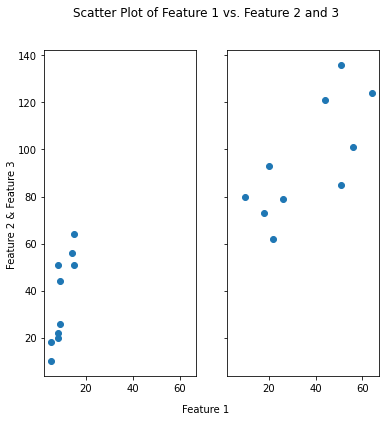

In [12]:
# Reference: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1,ncols=2,sharex=True, sharey=True, figsize=(6, 6))
fig.suptitle('Scatter Plot of Feature 1 vs. Feature 2 and 3')

axs[0].scatter(np.array(data)[0:,0], np.array(data)[0:,1])
axs[1].scatter(np.array(data)[0:,1], np.array(data)[0:,2])

fig.text(0.5, 0.04, 'Feature 1', ha='center')
fig.text(0.04, 0.5, 'Feature 2 & Feature 3' , va='center', rotation='vertical')
#plt.tight_layout()

Text(0, 0.5, 'Feature 3')

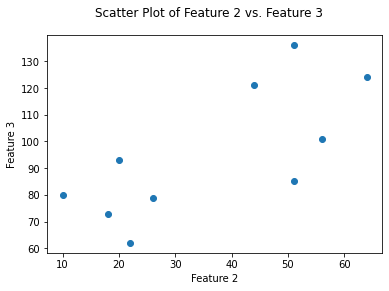

In [13]:
plt.scatter(np.array(data)[0:,1], np.array(data)[0:,2])
plt.suptitle('Scatter Plot of Feature 2 vs. Feature 3')
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')

In [14]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

We can use the "labels" method to get our data labels.  Each different integer represents a different cluster.  Note that its MCC is 0.816.

In [15]:
Military_pred_kmeans = kmeans.labels_
print("Military_Yes_No_True = ", np.array(Military_Yes_No_True))
print("Military_pred_kmeans = ", Military_pred_kmeans)
matthews_corrcoef(Military_Yes_No_True, Military_pred_kmeans)

Military_Yes_No_True =  [1 0 0 0 1 0 0 1 1 1]
Military_pred_kmeans =  [1 1 0 0 1 0 0 1 1 1]


0.816496580927726

Do the lables make sense based on our input data?  Go back to the in-class activity and see if the labels are the same.  Note that this algorithm may choose a different label convention (i.e., not 1=Military and 0=Non-Military, like in our example).  What we are interested in is the correct pattern in the label sequence.

**Response** Yes, the lables make sense.

Now let's find our centroids.  Do they match what you calculated where you wrote the code above?

In [16]:
kmeans.cluster_centers_

array([[ 11.5       ,  53.75      , 120.5       ],
       [  8.33333333,  24.5       ,  78.66666667]])

In [17]:
centers_2 = np.array([[8,24,78],[11,54,120]])      # Two Centers
centers_2, new_sets_2, clusters_2 = user_kmeans(centers_2,data)
print(clusters_2)
print(centers_2)
print(new_sets_2[0])
print(new_sets_2[1])

[ 8 24 78] [ 11  54 120]
[ 8.33333333 24.5        78.66666667] [ 11.5   53.75 120.5 ]
[ 8.33333333 24.5        78.66666667] [ 11.5   53.75 120.5 ]
[ 8.33333333 24.5        78.66666667] [ 11.5   53.75 120.5 ]
[ 8.33333333 24.5        78.66666667] [ 11.5   53.75 120.5 ]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 0, 1, 1, 0, 1, 1, 0, 0, 0]]
[array([ 8.33333333, 24.5       , 78.66666667]), array([ 11.5 ,  53.75, 120.5 ])]
[[8, 15, 8, 5, 5, 9], [22, 51, 20, 10, 18, 26], [62, 85, 93, 80, 73, 79]]
[[9, 8, 15, 14], [44, 51, 64, 56], [121, 136, 124, 101]]


In [18]:
# This choice led to a single cluster
centers_3 = np.array([[5,15,10],[10,30,50]])      # Two Centers
centers_3, new_sets_3, clusters_3 = user_kmeans(centers_3,data)
print(clusters_3)
print(centers_3)
print(new_sets_3[0])
print(new_sets_3[1])

[ 5 15 10] [10 30 50]
[nan nan nan] [ 9.6 36.2 95.4]
[ 9.6 36.2 95.4] [nan nan nan]
[ 9.6 36.2 95.4] [nan nan nan]
[ 9.6 36.2 95.4] [nan nan nan]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[array([ 9.6, 36.2, 95.4]), array([nan, nan, nan])]
[[8, 15, 9, 8, 8, 15, 14, 5, 5, 9], [22, 51, 44, 51, 20, 64, 56, 10, 18, 26], [62, 85, 121, 136, 93, 124, 101, 80, 73, 79]]
[[], [], []]


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.